> Copyright 2022 University of Luxembourg
> 
> Licensed under the Apache License, Version 2.0 (the "License");  
> you may not use this file except in compliance with the License.  
> You may obtain a copy of the License at  
>
>    https://www.apache.org/licenses/LICENSE-2.0
>
> Unless required by applicable law or agreed to in writing, software  
> distributed under the License is distributed on an "AS IS" BASIS,  
> WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.  
> See the License for the specific language governing permissions and  
> limitations under the License.  
>
***

Author: André Stemper (andre.stemper@uni.lu)

***

In [32]:
import pandas as pd
import numpy as np 
import os
from  scipy import interpolate
import matplotlib.pyplot as plt
%matplotlib inline


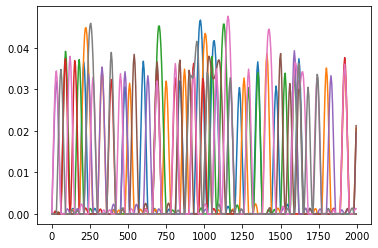

In [33]:

# path to input file
path ='.'

# labels of heat sources
heat_source_labels = ['H0','H1','H2','H3','H4','H5','H6','H7']

value_lower = 0.0    # [mW]
value_upper = 0.050  # [mW]

time_between_change = 30.0
sample_period = 5.0

time_start = 0.0     # [s]
time_end   = 25000.0  # [s]
use_periodic_changes = True
nr_discrete_changes = int((time_end - time_start)/time_between_change)

heat_dataframe = pd.DataFrame()

if use_periodic_changes:
    disc_t = np.arange(time_start-time_between_change, time_end+time_between_change, time_between_change)
else:
    disc_t = np.sort((np.random.rand(nr_discrete_changes)) * ((time_end+1)-time_start)) + time_start

disc_y =  np.random.rand( len(heat_source_labels), len(disc_t))*(value_upper-value_lower) + value_lower

disc_y = (disc_y > value_upper*0.6) * (disc_y < value_upper*0.8) * disc_y

t = np.arange(time_start, time_end, sample_period) 
heat_dataframe['t'] = t
for i, column in enumerate(heat_source_labels):
    spline = interpolate.splrep(disc_t, disc_y[i])
    val = interpolate.splev(t, spline)
    val = (val > 0) * val
    heat_dataframe[column] = val

heat_source_labels_show =  ['H0','H1','H2','H3','H4','H5','H6','H7']

for label in heat_source_labels_show:
    plt.plot(heat_dataframe['t'][0:400], heat_dataframe[label][0:400])
plt.savefig("modulation.png", dpi=300)


In [34]:
heat_dataframe.to_csv(path_or_buf=path+os.sep+'heatsource_sequence.csv', sep=';')